# Fitting the Future

## Imports

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

## Fitting time series models

### Fitting AR and MA models

In [20]:
sample = pd.DataFrame(
    {'timeseries_1': arma_generate_sample([1, -0.89, 0.28], [1], nsample=1000),
     'timeseries_2' : arma_generate_sample([1], [1, 0.2, 0.6, -0.1], nsample=1000)}
)


In [17]:
# Instantiate the model
model = ARIMA(sample['timeseries_1'], order=(2, 0, 0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           timeseries_1   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1433.648
Date:                Wed, 17 Sep 2025   AIC                           2875.296
Time:                        10:46:29   BIC                           2894.927
Sample:                             0   HQIC                          2882.757
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1874      0.079      2.366      0.018       0.032       0.343
ar.L1          0.8898      0.030     29.954      0.000       0.832       0.948
ar.L2         -0.2953      0.029    -10.217      0.0

In [21]:
# Instantiate the model
model = ARIMA(sample['timeseries_2'], order=(0, 0, 3))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           timeseries_2   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1413.913
Date:                Wed, 17 Sep 2025   AIC                           2837.827
Time:                        10:48:03   BIC                           2862.366
Sample:                             0   HQIC                          2847.153
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0142      0.051      0.276      0.783      -0.087       0.115
ma.L1          0.1882      0.033      5.729      0.000       0.124       0.253
ma.L2          0.5623      0.026     21.292      0.0

### Fitting an ARMA model

In [23]:
earthquake = pd.read_csv('earthquakes.csv', parse_dates=['date'], index_col='date')

In [24]:
# Instantiate the model
model = ARIMA(earthquake['earthquakes_per_year'], order=(3, 0, 1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(3, 0, 1)   Log Likelihood                -315.673
Date:                  Wed, 17 Sep 2025   AIC                            643.345
Time:                          10:51:18   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6453      2.233      8.798      0.000      15.269      24.022
ar.L1          0.5795      0.645      0.899      0.369      -0.684       1.843
ar.L2          0.0251      0.308    

### Fitting an ARMAX model

In [25]:
hospital = pd.read_csv('hospital.csv', parse_dates=['date'], index_col='date')

In [26]:
# Instantiate the model
model = ARIMA(hospital['wait_times_hrs'], order=(2, 0, 1), exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -11.834
Date:                Wed, 17 Sep 2025   AIC                             35.668
Time:                        11:04:06   BIC                             54.411
Sample:                    03-04-2019   HQIC                            43.275
                         - 03-10-2019                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1001      0.086     24.375      0.000       1.931       2.269
nurse_count    -0.1171      0.012     -9.562      0.000      -0.141      -0.093
ar.L1           0.5693      0.169      3.365    

## Forecasting

### Generating one-step-ahead predictions

In [57]:
amazon = pd.read_csv('amazon_close.csv', parse_dates=True, index_col='date').sort_index()

In [58]:
# Instantiate the model
model = ARIMA(amazon['close'], order=(3, 0, 3))

# Fit the model
results = model.fit()

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [59]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast)

date
2018-12-27    1470.514470
2018-12-28    1456.158446
2018-12-31    1473.535792
2019-01-02    1500.892598
2019-01-03    1540.739690
2019-01-04    1504.424175
2019-01-07    1576.442343
2019-01-08    1624.124906
2019-01-09    1649.548468
2019-01-10    1657.019515
2019-01-11    1660.281381
2019-01-14    1647.627369
2019-01-15    1621.996595
2019-01-16    1671.246451
2019-01-17    1674.918982
2019-01-18    1686.884995
2019-01-22    1697.138720
2019-01-23    1641.109767
2019-01-24    1648.852991
2019-01-25    1655.012536
2019-01-28    1662.166858
2019-01-29    1629.862724
2019-01-30    1594.484009
2019-01-31    1675.297850
2019-02-01    1720.793131
2019-02-04    1628.050211
2019-02-05    1634.149837
2019-02-06    1655.835364
2019-02-07    1636.834591
2019-02-08    1614.551209
Name: predicted_mean, dtype: float64


### Plotting one-step-ahead predictions

In [63]:
amazon.loc['2019']

,close
date,
2019-01-02,1539.13
2019-01-03,1500.28
2019-01-04,1575.39
2019-01-07,1629.51
2019-01-08,1656.58
2019-01-09,1659.42
2019-01-10,1656.22
2019-01-11,1640.56
2019-01-14,1617.21


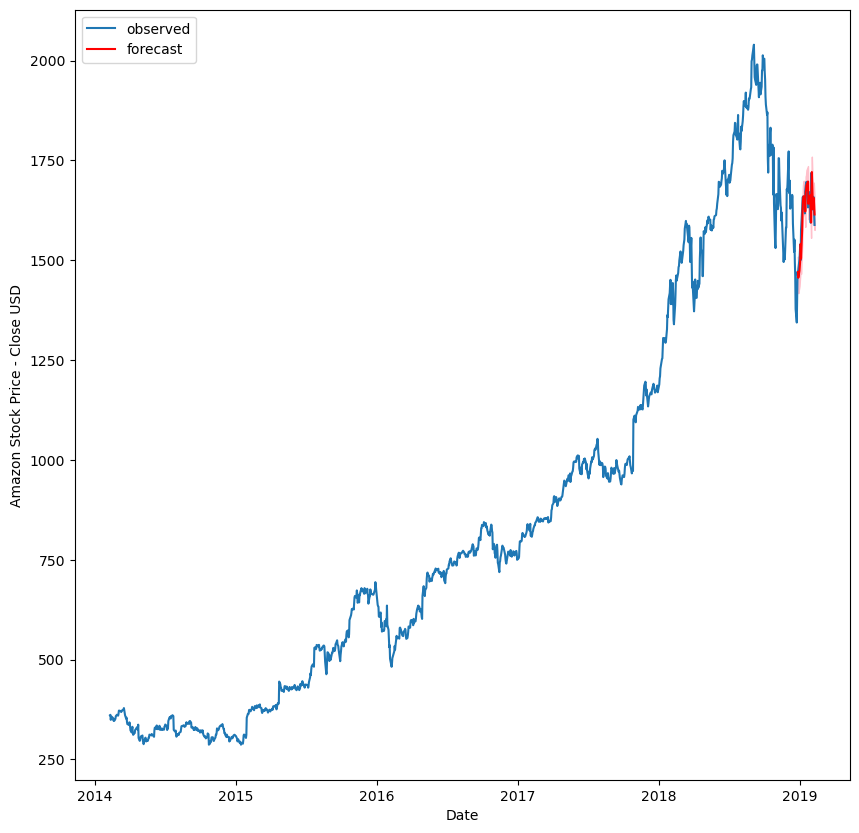

In [66]:
plt.figure(figsize=(10,10))

# plot the amazon data
plt.plot(amazon.index, amazon['close'], label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits,
		 color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

### Generating dynamic forecasts

In [67]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

date
2018-12-27    1470.514470
2018-12-28    1464.725322
2018-12-31    1460.635563
2019-01-02    1461.452364
2019-01-03    1465.852390
2019-01-04    1469.624664
2019-01-07    1469.574328
2019-01-08    1466.116126
2019-01-09    1462.508050
2019-01-10    1461.761085
2019-01-11    1464.113382
2019-01-14    1467.146667
2019-01-15    1468.142716
2019-01-16    1466.423649
2019-01-17    1463.692658
2019-01-18    1462.315753
2019-01-22    1463.238578
2019-01-23    1465.347341
2019-01-24    1466.650145
2019-01-25    1466.067543
2019-01-28    1464.243438
2019-01-29    1462.800952
2019-01-30    1462.853091
2019-01-31    1464.117171
2019-02-01    1465.314898
2019-02-04    1465.371076
2019-02-05    1464.302360
2019-02-06    1463.077743
2019-02-07    1462.687193
2019-02-08    1463.299467
Name: predicted_mean, dtype: float64


### Plotting dynamic forecasts

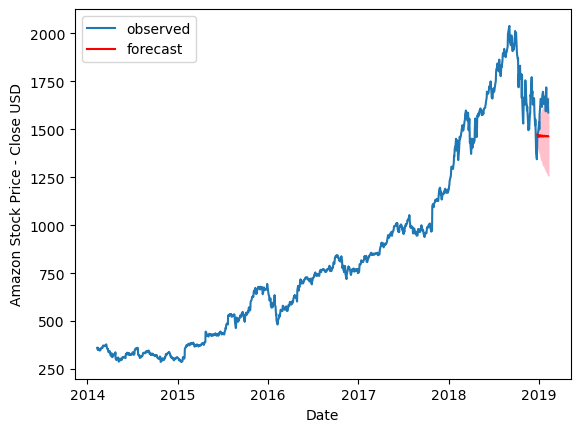

In [68]:
# plot the amazon data
plt.plot(amazon.index, amazon['close'], label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits,
                  color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

## Intro to ARIMA models

### Differencing and fitting ARMA

In [69]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = ARIMA(amazon_diff, order=(2, 0, 2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5532.371
Date:                Thu, 18 Sep 2025   AIC                          11076.743
Time:                        09:19:27   BIC                          11107.566
Sample:                             0   HQIC                         11088.327
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9870      0.494      1.997      0.046       0.018       1.956
ar.L1         -0.1540      0.073     -2.120      0.034      -0.296      -0.012
ar.L2          0.7945      0.072     11.094      0.0

### Unrolling ARMA forecast

In [74]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = arma_diff_forecast.cumsum()

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon['close'].iloc[-1]

# Print forecast
print(arma_value_forecast)

1258    1592.061610
1259    1594.210171
1260    1597.286346
1261    1598.874439
1262    1601.428775
1263    1602.651935
1264    1604.847864
1265    1605.836278
1266    1607.783596
1267    1608.623789
Name: predicted_mean, dtype: float64


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### Fitting an ARIMA model

In [75]:
# Create ARIMA(2,1,2) model
arima = ARIMA(amazon['close'], order=(2, 1, 2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1259    1593.644605
1260    1601.911126
1261    1605.418036
1262    1600.970328
1263    1592.690009
1264    1588.196216
1265    1591.594617
1266    1599.726611
1267    1605.104699
1268    1602.806417
Name: predicted_mean, dtype: float64


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
